# Training ML Models

Based on our subjective testing data

# Notes

**07.11**
Previously the bitrate was used in mbits/second
Now the p1203 model clearly uses kbits/second

I am collecting all video bitrates in bytes and then converting them to mbits/second, before multiplying them by 1000 to get kbits/second
I am also only storing the bitrate in kbits to avoid confusion

The way to get the megabits values is:
1. get the size of the bin file in bytes (or kilobytes)
2. convert it to megabits by dividing by 125000
3. divide it by 10 (since the bin file is for 10-seconds) to get megabits / second
4. multiply it by 1000 to get kbit/s
5. All of our sequences are 10-second sequences, thus we divide by 10

The video bitrates are as follows:

### New Videos
##### Note: these bitrates in kilobits per second (1 second = 25 frames). Sequences were 10 seconds at 25 FPS.

#### VPCC
```
BlueSpin-r1.bin: 1433.63
BlueSpin-r2.bin: 1879.94
BlueSpin-r3.bin: 2599.09 
BlueSpin-r4.bin: 6166.38 
BlueSpin-r5.bin: 10338.01 
CasualSquat-r1.bin: 2050.91
CasualSquat-r2.bin: 3210.33
CasualSquat-r3.bin: 5455.91
CasualSquat-r4.bin: 15984.88
CasualSquat-r5.bin: 25490.93 
FlowerDance-r1.bin: 2181.68
FlowerDance-r2.bin: 3474.92
FlowerDance-r3.bin: 5839.72
FlowerDance-r4.bin: 18687.28
FlowerDance-r5.bin: 32238.91
ReadyForWinter-r1.bin: 1620.30
ReadyForWinter-r2.bin: 2118.38
ReadyForWinter-r3.bin: 2961.38
ReadyForWinter-r4.bin: 7653.66
ReadyForWinter-r5.bin: 13593.42

```

#### GPCC OCTREE PREDLIFT

```
BlueSpin	GPCC_OCTREE	r03: 1366.04
BlueSpin	GPCC_OCTREE	r04: 4606.08
BlueSpin	GPCC_OCTREE	r05: 10988.14
FlowerDance	GPCC_OCTREE	r03: 1975.61
FlowerDance	GPCC_OCTREE	r04: 8639.12
FlowerDance	GPCC_OCTREE	r05: 25093.15
CasualSquat	GPCC_OCTREE	r03: 1792.59
CasualSquat	GPCC_OCTREE	r04: 8044.45
CasualSquat	GPCC_OCTREE	r05: 23656.81
ReadyForWinter	GPCC_OCTREE	r03: 1563.84
ReadyForWinter	GPCC_OCTREE	r04: 5287.58
ReadyForWinter	GPCC_OCTREE	r05: 13415.51
```

#### GPCC TRISOUP RAHT
```
BlueSpin	GPCC_TRISOUP	r01: 994.33
BlueSpin	GPCC_TRISOUP	r02: 2168.64
BlueSpin	GPCC_TRISOUP	r03: 4873.64
BlueSpin	GPCC_TRISOUP	r04: 10980.66
FlowerDance	GPCC_TRISOUP	r01: 3026.20
FlowerDance	GPCC_TRISOUP	r02: 80246.72
FlowerDance	GPCC_TRISOUP	r03: 19089.43
FlowerDance	GPCC_TRISOUP	r04: 39907.74
CasualSquat	GPCC_TRISOUP	r01: 3834.42
CasualSquat	GPCC_TRISOUP	r02: 9256.12
CasualSquat	GPCC_TRISOUP	r03: 19714.69
CasualSquat	GPCC_TRISOUP	r04: 38777.29
ReadyForWinter	GPCC_TRISOUP	r01: 997.36
ReadyForWinter	GPCC_TRISOUP	r02: 2293.83
ReadyForWinter	GPCC_TRISOUP	r03: 6003.52
ReadyForWinter	GPCC_TRISOUP	r04: 14242.62
```

### OLD VIDEOS
#### VPCC (These videos were only VPCC)
##### Note: these bitrates in kilobits per second (1 second = 30 frames). Sequences were 10 seconds at 30 FPS.

```
longdress-r1.bin: 4641.84
longdress-r3.bin: 14050.27
longdress-r5.bin: 46778.92
loot-r1.bin: 2275.71
loot-r3.bin: 5626.05
loot-r5.bin: 16675.10
redandblack-r1.bin: 3386.18
redandblack-r3.bin: 7552.36
redandblack-r5.bin: 22904.12
soldier-r1.bin: 4377.10
soldier-r3.bin: 11581.69
soldier-r5.bin: 35289.80
```

## Calculate bitrates from .bin files for VPCC

In [1]:
import os
directory_path = 'bitstream-files/vpcc'
vpcc_bin_bitrates_bytes = []

# Get all files in directory
for filename in os.listdir(directory_path):
    filepath = os.path.join(directory_path, filename)
    if os.path.isfile(filepath):
        size_on_disk = os.path.getsize(filepath)
        vpcc_bin_bitrates_bytes.append((filename, size_on_disk))

# Display the results
for name, size in vpcc_bin_bitrates_bytes:
    bits = size * 8
    kbits = bits / 1000
    mbits = kbits / 1000
    kbits_per_second = kbits / 10
    print(f'{name}: {kbits_per_second:.2f} kilobits per second')


BlueSpin-r1.bin: 1433.63 kilobits per second
BlueSpin-r2.bin: 1879.94 kilobits per second
BlueSpin-r3.bin: 2599.09 kilobits per second
BlueSpin-r4.bin: 6166.38 kilobits per second
BlueSpin-r5.bin: 10338.01 kilobits per second
CasualSquat-r1.bin: 2050.91 kilobits per second
CasualSquat-r2.bin: 3210.33 kilobits per second
CasualSquat-r3.bin: 5455.91 kilobits per second
CasualSquat-r4.bin: 15984.88 kilobits per second
CasualSquat-r5.bin: 25490.93 kilobits per second
FlowerDance-r1.bin: 2181.68 kilobits per second
FlowerDance-r2.bin: 3474.92 kilobits per second
FlowerDance-r3.bin: 5839.72 kilobits per second
FlowerDance-r4.bin: 18687.28 kilobits per second
FlowerDance-r5.bin: 32238.91 kilobits per second
longdress-r1.bin: 4641.84 kilobits per second
longdress-r3.bin: 14050.27 kilobits per second
longdress-r5.bin: 46778.92 kilobits per second
loot-r1.bin: 2275.71 kilobits per second
loot-r3.bin: 5626.05 kilobits per second
loot-r5.bin: 16675.10 kilobits per second
ReadyForWinter-r1.bin: 162

## Bitrates from log files for GPCC.

In [2]:
import os
import glob
import re

# GPCC directories
gpcc_logs_pcnames = ['BlueSpin', 'CasualSquat', 'FlowerDance', 'ReadyForWinter']
gpcc_logs_encodings = ['octree-predlift', 'trisoup-raht']
gpcc_logs_qualities = ['r01', 'r02', 'r03', 'r04', 'r05']

# GPCC base directory
base_dir = '/mnt/d/_Work/PointClouds/ComPEQ-MR/GPCC'

gpcc_bin_birates_bytes = []

for pcn in gpcc_logs_pcnames:
    for enc in gpcc_logs_encodings:
        for qual in gpcc_logs_qualities:
            dir_path = os.path.join(base_dir, pcn, enc, qual)

            if not os.path.isdir(dir_path):
                print(f"SKIP: Directory does not exist: {dir_path}")
                continue

            log_files = glob.glob(os.path.join(dir_path, "*.ply.bin.log"))
            
            if len(log_files) != 250:
                print(f"ERROR: {len(log_files)} log files found in {dir_path}, expected 250.")
            
            total_N = 0
            for log_file in log_files:
                with open(log_file, 'r') as f:
                    content = f.read()
                matches = re.findall(r"Total bitstream size (\d+) B", content)
                
                if len(matches) != 1:
                    print(f"ERROR: Found {len(matches)} matches in {log_file}, expected 1.")
                else:
                    total_N += int(matches[0])
            
            gpcc_bin_birates_bytes.append((base_dir, pcn, enc, qual, total_N))

# Print results
for base_dir, pcn, enc, qual, total_N in gpcc_bin_birates_bytes:
    print(f"{os.path.join(base_dir, pcn, enc, qual)}\n Total bitstream size = {total_N} B")
    bits = total_N * 8
    kbits = bits / 1000
    kbits_per_second = kbits / 10
    print(enc)
    print(pcn)
    print(qual)
    print(f"kbits_per_second: {kbits_per_second:.2f}")

SKIP: Directory does not exist: /mnt/d/_Work/PointClouds/ComPEQ-MR/GPCC/BlueSpin/octree-predlift/r01
SKIP: Directory does not exist: /mnt/d/_Work/PointClouds/ComPEQ-MR/GPCC/BlueSpin/octree-predlift/r02
SKIP: Directory does not exist: /mnt/d/_Work/PointClouds/ComPEQ-MR/GPCC/BlueSpin/trisoup-raht/r05
SKIP: Directory does not exist: /mnt/d/_Work/PointClouds/ComPEQ-MR/GPCC/CasualSquat/octree-predlift/r01
SKIP: Directory does not exist: /mnt/d/_Work/PointClouds/ComPEQ-MR/GPCC/CasualSquat/octree-predlift/r02
SKIP: Directory does not exist: /mnt/d/_Work/PointClouds/ComPEQ-MR/GPCC/CasualSquat/trisoup-raht/r05
SKIP: Directory does not exist: /mnt/d/_Work/PointClouds/ComPEQ-MR/GPCC/FlowerDance/octree-predlift/r01
SKIP: Directory does not exist: /mnt/d/_Work/PointClouds/ComPEQ-MR/GPCC/FlowerDance/octree-predlift/r02
SKIP: Directory does not exist: /mnt/d/_Work/PointClouds/ComPEQ-MR/GPCC/FlowerDance/trisoup-raht/r05
SKIP: Directory does not exist: /mnt/d/_Work/PointClouds/ComPEQ-MR/GPCC/ReadyForWi

# Imports

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

/home/shivi/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


# Universal Data

## Video Metadata

In [4]:
# User QoE Scores CSV File
# qoe_csv_filepath = './results/test_scores.csv'
qoe_csv_filepath = "./results/test_scores_only_compeq.csv"
results_folder = "./results_shivi"
error_data_folder = "./Error_Data"


# Bitrate and resolution information for all the videos in KBPS

# New aka ComPEQ-MR Dataset
bitrates_kbps_new_vpcc = {
    "BlueSpin": {
        "r01": 1433.63,
        "r02": 1879.94,
        "r03": 2599.09,
        "r04": 6166.38,
        "r05": 10338.01,
    },
    "CasualSquat": {
        "r01": 2050.91,
        "r02": 3210.33,
        "r03": 5455.91,
        "r04": 15984.88,
        "r05": 25490.93, 
    },
    "FlowerDance": {
        "r01": 2181.68,
        "r02": 3474.92,
        "r03":  5839.72,
        "r04":  18687.28,
        "r05": 32238.91,
    },
    "ReadyForWinter": {
        "r01": 1620.30,
        "r02": 2118.38,
        "r03": 2961.38,
        "r04": 7653.66,
        "r05": 13593.42,
    }
}

bitrates_kbps_new_gpcc_octree = {
    "BlueSpin": {"r03": 1366.04, 
                 "r04": 4606.08, 
                 "r05": 10988.14},
    "CasualSquat": {"r03": 1792.59, 
                    "r04": 8044.45, 
                    "r05": 23656.8},
    "FlowerDance": {"r03": 1975.61, 
                    "r04": 8639.12, 
                    "r05": 25093.15},
    "ReadyForWinter": {"r03": 1563.83, 
                       "r04": 5287.58, 
                       "r05": 13415.51},
}

bitrates_kbps_new_gpcc_trisoup = {
    "BlueSpin": {
        "r01": 994.33,
        "r02": 2168.64,
        "r03": 4873.64,
        "r04": 10980.66,
        },
    "CasualSquat": {
        "r01": 3834.42,
        "r02": 9256.12,
        "r03": 19714.69,
        "r04": 38777.29,
    },
    "FlowerDance": {
        "r01": 3026.20,
        "r02": 8024.67,
        "r03": 19089.43,
        "r04": 39907.74,
    },
    "ReadyForWinter": {
        "r01": 997.36,
        "r02": 2293.83,
        "r03": 6003.52,
        "r04": 14242.62,
    },
}

resolution_map_new = {
    "r01": "640x360",  # worse than 420p
    "r02": "852x480",  # exactly 480p
    "r03": "1192x672",  # bit worse than 720p
    "r04": "1533x864",  # a bit better than 720p
    "r05": "1920x1080",  # exactly 1080p
}

distance_map_new = {"d200": "200cm"}

### Test bitrates in dict are the same as bitrates gotten from bin files


In [ ]:
bitrate_test_pc_names = ['BlueSpin', 'CasualSquat', 'FlowerDance', 'ReadyForWinter']
bitrate_test_encodings = ['vpcc', 'octree-predlift', 'trisoup-raht']
bitrate_test_qualities = ['r01', 'r02', 'r03', 'r04', 'r05']

# get values from BIN files in KBPS

# vpcc_bin_bitrates_bytes
#  ('BlueSpin-r3.bin', 3248863),

# gpcc_bin_birates_bytes
#  ('/mnt/d/_Work/PointClouds/ComPEQ-MR/GPCC',
#   'ReadyForWinter',
#   'trisoup-raht',
#   'r04',
#   17803280)

print("Checking VPCC...")
for bin_file, size_bytes in vpcc_bin_bitrates_bytes:
    if "longdress" in bin_file or "soldier" in bin_file or "redandblack" in bin_file or "loot" in bin_file:
        continue
    pc_name = str(bin_file).split(".")[0].split("-")[0] # get BlueSpin from BlueSpin-r3.bin
    qual =  str(bin_file).split(".")[0].split("-")[1] # get r3 from BlueSpin-r3.bin
    qual = qual[0] + "0" + qual[1] # get r03 from r3
    size_bits = size_bytes * 8
    size_kbits = size_bits / 1000
    size_kbits_per_second = round(size_kbits / 10, 2) # kbit per seconds with two decimal places, just like our stored dict

    print(f"Checking {pc_name} for quality {qual} with bitrate from bin files {size_kbits_per_second} kbps " + 
          "and bitrate from dict {bitrates_kbps_new_vpcc[pc_name][qual]}")

    if bitrates_kbps_new_vpcc[pc_name][qual] != size_kbits_per_second:
        print(bitrates_kbps_new_vpcc[pc_name][qual])
        raise ValueError("Bitrate values are not equal!")

print("Checking GPCC...")
for dir, pc_name, enc, qual, size_bytes in gpcc_bin_birates_bytes:
    size_bits = size_bytes * 8
    size_kbits = size_bits / 1000
    size_kbits_per_second = round(size_kbits / 10, 2) # kbit per seconds with two decimal places, just like our stored dict

    bitrate_from_dict = -1

    if enc == "trisoup-raht":
        bitrate_from_dict = bitrates_kbps_new_gpcc_trisoup[pc_name][qual]
    elif enc == "octree-predlift":
        bitrate_from_dict = bitrates_kbps_new_gpcc_octree[pc_name][qual]
    else:
        raise ValueError("Encoding set to something invalid in the data from bin files!")
    
    print(f"Checking {pc_name} for quality {qual} with bitrate from bin files {size_kbits_per_second} kbps " + 
          "and bitrate from dict {bitrate_from_dict}")

    if bitrate_from_dict != size_kbits_per_second:
        print(bitrate_from_dict)
        raise ValueError("Bitrate values are not equal!")
    


print("Test passed: Bitrate values are equal!")

Checking VPCC...
Checking BlueSpin for quality r01 with bitrate from bin files 1433.63 kbps and bitrate from dict {bitrates_kbps_new_vpcc[pc_name][qual]}
Checking BlueSpin for quality r02 with bitrate from bin files 1879.94 kbps and bitrate from dict {bitrates_kbps_new_vpcc[pc_name][qual]}
Checking BlueSpin for quality r03 with bitrate from bin files 2599.09 kbps and bitrate from dict {bitrates_kbps_new_vpcc[pc_name][qual]}
Checking BlueSpin for quality r04 with bitrate from bin files 6166.38 kbps and bitrate from dict {bitrates_kbps_new_vpcc[pc_name][qual]}
Checking BlueSpin for quality r05 with bitrate from bin files 10338.01 kbps and bitrate from dict {bitrates_kbps_new_vpcc[pc_name][qual]}
Checking CasualSquat for quality r01 with bitrate from bin files 2050.91 kbps and bitrate from dict {bitrates_kbps_new_vpcc[pc_name][qual]}
Checking CasualSquat for quality r02 with bitrate from bin files 3210.33 kbps and bitrate from dict {bitrates_kbps_new_vpcc[pc_name][qual]}
Checking CasualSq

In [6]:
print("Bitrates in Mbit per second")
print("VPCC")
for pointcloud in bitrates_kbps_new_vpcc:
    print(pointcloud)
    for rate in bitrates_kbps_new_vpcc[pointcloud]:
        print(f"{bitrates_kbps_new_vpcc[pointcloud][rate]/1000:.2f}")

print("GPCC OCTREE")
for pointcloud in bitrates_kbps_new_gpcc_octree:
    print(pointcloud)
    for rate in bitrates_kbps_new_gpcc_octree[pointcloud]:
        print(f"{bitrates_kbps_new_gpcc_octree[pointcloud][rate]/1000:.2f}")

print("GPCC TRISOUP")
for pointcloud in bitrates_kbps_new_gpcc_trisoup:
    print(pointcloud)
    for rate in bitrates_kbps_new_gpcc_trisoup[pointcloud]:
        print(f"{bitrates_kbps_new_gpcc_trisoup[pointcloud][rate]/1000:.2f}")

Bitrates in Mbit per second
VPCC
BlueSpin
1.43
1.88
2.60
6.17
10.34
CasualSquat
2.05
3.21
5.46
15.98
25.49
FlowerDance
2.18
3.47
5.84
18.69
32.24
ReadyForWinter
1.62
2.12
2.96
7.65
13.59
GPCC OCTREE
BlueSpin
1.37
4.61
10.99
CasualSquat
1.79
8.04
23.66
FlowerDance
1.98
8.64
25.09
ReadyForWinter
1.56
5.29
13.42
GPCC TRISOUP
BlueSpin
0.99
2.17
4.87
10.98
CasualSquat
3.83
9.26
19.71
38.78
FlowerDance
3.03
8.02
19.09
39.91
ReadyForWinter
1.00
2.29
6.00
14.24


In [54]:
# Getting bitrates in mbits for the raw PC files

import os
import glob
import re

# directories containing "raw" vox10 pc files directly from uvg-vpc dataset
directories = [
    '/mnt/d/_Work/PointClouds/ComPEQ-MR/VPCC/BlueSpin/vox10',
    '/mnt/d/_Work/PointClouds/ComPEQ-MR/VPCC/CasualSquat/vox10',
    '/mnt/d/_Work/PointClouds/ComPEQ-MR/VPCC/FlowerDance/vox10',
    '/mnt/d/_Work/PointClouds/ComPEQ-MR/VPCC/ReadyForWinter/vox10'
]

# Constants for sizes 
double_size_bits = 10  # double is 8 bytes BUT!! vox 10 means position is rounded to 10 bits per coordinate
uchar_size_bits = 8   # uchar is 1 byte

raw_vpcc_bitrates = []

for dir_path in directories:
    ply_files = glob.glob(os.path.join(dir_path, "*.ply"))
    
    if len(ply_files) != 250:
        raise ValueError(f"ERROR: {len(ply_files)} PLY files found in {dir_path}, expected 250.")
    
    dir_point_count = 0
    dir_total_bits = 0
    
    for ply_file in ply_files:
        with open(ply_file, "rb") as f:
            header = []
            while True:
                line = f.readline()
                if not line:
                    raise ValueError(f"ERROR: Header not complete in file {ply_file}")
                header.append(line.decode('ascii', errors='ignore').strip())
                if line.strip() == b"end_header":
                    break
            # Find number of points
            element_vertex_line = [line for line in header if line.startswith("element vertex")]
            if not element_vertex_line:
                raise ValueError(f"ERROR: No 'element vertex' line in file {ply_file}")
            num_points = int(element_vertex_line[0].split()[-1])
            
            dir_point_count += num_points
            # Each point: 3 doubles + 3 uchars = 3*10 + 3*8 = 54 bits!
            file_bits = num_points * (3 * double_size_bits + 3 * uchar_size_bits)
            dir_total_bits += file_bits
    
    dir_total_bytes = dir_total_bits / 8
    dir_total_kbits = dir_total_bits / 1000
    dir_total_mbits = dir_total_bits / 1_000_000
    raw_vpcc_bitrates.append({
        "directory": dir_path,
        "total_points": dir_point_count,
        "total_bytes": dir_total_bytes,
        "total_bits": dir_total_bits,
        "total_kbits": dir_total_kbits,
        "total_mbits": dir_total_mbits
    })

# Print summary
for res in raw_vpcc_bitrates:
    print(f"Directory: {res['directory']}")
    print("Printing for 250 frames!")
    print(f"  Total points: {res['total_points']}")
    print(f"  Total bytes: {res['total_bytes']}")
    print(f"  Total bits: {res['total_bits']}")
    print(f"  Total kbits: {res['total_kbits']}")
    print(f"  Total mbits: {res['total_mbits']:.3f}")
    print(f"Bitrates in mbit per second: {res['total_mbits']/10:.2f}")

Directory: /mnt/d/_Work/PointClouds/ComPEQ-MR/VPCC/BlueSpin/vox10
Printing for 250 frames!
  Total points: 171261010
  Total bytes: 1156011817.5
  Total bits: 9248094540
  Total kbits: 9248094.54
  Total mbits: 9248.095
Bitrates in mbit per second: 924.81
Directory: /mnt/d/_Work/PointClouds/ComPEQ-MR/VPCC/CasualSquat/vox10
Printing for 250 frames!
  Total points: 153604766
  Total bytes: 1036832170.5
  Total bits: 8294657364
  Total kbits: 8294657.364
  Total mbits: 8294.657
Bitrates in mbit per second: 829.47
Directory: /mnt/d/_Work/PointClouds/ComPEQ-MR/VPCC/FlowerDance/vox10
Printing for 250 frames!
  Total points: 188824722
  Total bytes: 1274566873.5
  Total bits: 10196534988
  Total kbits: 10196534.988
  Total mbits: 10196.535
Bitrates in mbit per second: 1019.65
Directory: /mnt/d/_Work/PointClouds/ComPEQ-MR/VPCC/ReadyForWinter/vox10
Printing for 250 frames!
  Total points: 198579289
  Total bytes: 1340410200.75
  Total bits: 10723281606
  Total kbits: 10723281.606
  Total mbits:

## QP Data for the ML Models

In [7]:
vpcc_g_qp_map = {"r01": 36, "r02": 32, "r03": 28, "r04": 20, "r05": 16}
vpcc_t_qp_map = {"r01": 47, "r02": 42, "r03": 37, "r04": 27, "r05": 22}

gpcc_octree_qp = {"r03": 40, "r04": 34, "r05": 28}
gpcc_octree_depth = {"r03": 0.5, "r04": 0.75, "r05": 0.875}

gpcc_trisoup_qp = {"r01": 40, "r02": 34, "r03": 28, "r04": 22}
gpcc_trisoup_level = {"r01": 5, "r02": 4, "r03": 3, "r04": 2}

## MOS Data

In [8]:
# Get this from the mos file in the dataset - mos_ci.csv

mos_new = {
    "VPCC": {
        "BlueSpin": {
            "r01": 1.4390243902439024,
            "r02": 2.097560975609756,
            "r03": 2.658536585365854,
            "r04": 3.268292682926829,
            "r05": 3.341463414634146,
        },
        "CasualSquat": {
            "r01": 1.853658536585366,
            "r02": 2.5853658536585367,
            "r03": 2.7804878048780486,
            "r04": 3.4146341463414633,
            "r05": 3.6097560975609757,
        },
        "ReadyForWinter": {
            "r01": 1.6585365853658536,
            "r02": 2.073170731707317,
            "r03": 2.731707317073171,
            "r04": 3.3902439024390243,
            "r05": 3.658536585365854,
        },
        "FlowerDance": {
            "r01": 1.7317073170731707,
            "r02": 2.3902439024390243,
            "r03": 2.902439024390244,
            "r04": 3.3658536585365852,
            "r05": 3.8048780487804876,
        },
    },
    "GPCC_OCTREE": {
        "BlueSpin": {
            "r03": 1.5365853658536586,
            "r04": 1.975609756097561,
            "r05": 2.682926829268293,
        },
        "CasualSquat": {
            "r03": 1.4390243902439024,
            "r04": 2.097560975609756,
            "r05": 3.5121951219512195,
        },
        "ReadyForWinter": {
            "r03": 1.4634146341463414,
            "r04": 2.097560975609756,
            "r05": 3,
        },
        "FlowerDance": {
            "r03": 1.3902439024390243,
            "r04": 1.975609756097561,
            "r05": 3.317073170731707,
        },
    },
    "GPCC_TRISOUP": {
        "BlueSpin": {
            "r01": 1.3658536585365855,
            "r02": 2.317073170731707,
            "r03": 3.1707317073170733,
            "r04": 3.6097560975609757,
        },
        "CasualSquat": {
            "r01": 1.3658536585365855,
            "r02": 2.4390243902439024,
            "r03": 3.4634146341463414,
            "r04": 3.6341463414634148,
        },
        "ReadyForWinter": {
            "r01": 1.2926829268292683,
            "r02": 2.268292682926829,
            "r03": 3.024390243902439,
            "r04": 3.5121951219512195,
        },
        "FlowerDance": {
            "r01": 1.3902439024390243,
            "r02": 2.5609756097560976,
            "r03": 3.4390243902439024,
            "r04": 3.902439024390244,
        },
    },
}

# mos_new_vpcc = {
#     'BlueSpin': {'r01': 1.4390243902439024,
#                  'r02': 2.097560975609756,
#                  'r03': 2.658536585365854,
#                  'r04': 3.268292682926829,
#                  'r05': 3.341463414634146},
#     'CasualSquat':  {'r01': 1.853658536585366,
#                      'r02': 2.5853658536585367,
#                      'r03': 2.7804878048780486,
#                      'r04': 3.4146341463414633,
#                      'r05': 3.6097560975609757},
#     'ReadyForWinter': {'r01': 1.6585365853658536,
#                        'r02': 2.073170731707317,
#                        'r03': 2.731707317073171,
#                        'r04': 3.3902439024390243,
#                        'r05': 3.658536585365854},
#     'FlowerDance': {'r01': 1.7317073170731707,
#                     'r02': 2.3902439024390243,
#                     'r03': 2.902439024390244,
#                     'r04': 3.3658536585365852,
#                     'r05': 3.8048780487804876},
# }

# mos_new_gpcc_octree = {
#     'BlueSpin': {'r03': 1.5365853658536586,
#                  'r04': 1.975609756097561,
#                  'r05': 2.682926829268293,
#                  },
#     'CasualSquat':  {'r03': 1.4390243902439024,
#                      'r04': 2.097560975609756,
#                      'r05': 3.5121951219512195,
#                      },
#     'ReadyForWinter': {'r03': 1.4634146341463414,
#                        'r04': 2.097560975609756,
#                        'r05': 3,
#                        },
#     'FlowerDance': {'r03': 1.3902439024390243,
#                     'r04': 1.975609756097561,
#                     'r05': 3.317073170731707,
#                     },
# }

# mos_new_gpcc_trisoup = {
#     'BlueSpin': {'r01': 1.3658536585365855,
#                  'r02': 2.317073170731707,
#                  'r03': 3.1707317073170733,
#                  'r04': 3.6097560975609757,
#                  },
#     'CasualSquat':  {'r01': 1.3658536585365855,
#                      'r02': 2.4390243902439024,
#                      'r03': 3.4634146341463414,
#                      'r04': 3.6341463414634148,
#                      },
#     'ReadyForWinter': {'r01': 1.2926829268292683,
#                        'r02': 2.268292682926829,
#                        'r03': 3.024390243902439,
#                        'r04': 3.5121951219512195,
#                        },
#     'FlowerDance': {'r01': 1.3902439024390243,
#                     'r02': 2.5609756097560976,
#                     'r03': 3.4390243902439024,
#                     'r04': 3.902439024390244,
#                     },
# }

## PSNR Data

In [9]:
videos = ["BlueSpin", "FlowerDance", "CasualSquat", "ReadyForWinter"]

qualities_vpcc = ["r01", "r02", "r03", "r04", "r05"]
qualities_gpcc_octree = ["r03", "r04", "r05"]
qualities_gpcc_trisoup = ["r01", "r02", "r03", "r04"]

## Codec Control

In [10]:
# CODEC CONTROL
codecs = ["VPCC", "GPCC_OCTREE", "GPCC_TRISOUP"]

# Utility Functions (ML and PSNR)

In [11]:
# Split the object string into object, codec, quality, and distance
def split_object_column(object_string):
    if (
        "BlueSpin" in object_string
        or "FlowerDance" in object_string
        or "ReadyForWinter" in object_string
        or "CasualSquat" in object_string
    ):
        split_string = object_string.split("_")
        # split_string[1] = split_string[2] # this was to overwrite the VPCC codec split string when I was only training the P1203 model

        if "GPCC" in split_string[1]:
            split_string[1] = split_string[1] + "_" + split_string[2]
            split_string[2] = split_string[3]
            split_string[3] = split_string[4]
            del split_string[4]
        if len(split_string) != 4:
            print(split_string)
        return split_string

In [12]:
def get_dist_string(dist):
    # if dist in distance_map_old.keys():
    #     return distance_map_old[dist]
    if dist in distance_map_new.keys():
        return distance_map_new[dist]

In [13]:
def map_first_qual_to_qps(codec, qual):
    if "VPCC" in codec:
        return vpcc_g_qp_map[qual]
    elif "GPCC_OCTREE" in codec:
        return gpcc_octree_qp[qual]
    elif "GPCC_TRISOUP" in codec:
        return gpcc_trisoup_qp[qual]


def map_second_qual_to_qps(codec, qual):
    if "VPCC" in codec:
        return vpcc_t_qp_map[qual]
    elif "GPCC_OCTREE" in codec:
        return gpcc_octree_depth[qual]
    elif "GPCC_TRISOUP" in codec:
        return gpcc_trisoup_level[qual]


def map_both_qual_to_qps(qual, codec):
    if "VPCC" in codec:
        return (vpcc_g_qp_map[qual], vpcc_t_qp_map[qual])
    elif "GPCC_OCTREE" in codec:
        return (gpcc_octree_qp[qual], gpcc_octree_depth[qual])
    elif "GPCC_TRISOUP" in codec:
        return (gpcc_trisoup_qp[qual], gpcc_trisoup_level[qual])

In [14]:
def get_bitrate_for_qual(object_name, codec, qual):
    if "VPCC" in codec:
        return bitrates_kbps_new_vpcc[object_name][qual]
    elif "GPCC_OCTREE" in codec:
        return bitrates_kbps_new_gpcc_octree[object_name][qual]
    elif "GPCC_TRISOUP" in codec:
        return bitrates_kbps_new_gpcc_trisoup[object_name][qual]

In [15]:
# Remove outliers using the boxplot method
def boxplot_outlier_filter(frame):
    """
    Outlier filter using interquantile range (filter below Q1 - 1.5 IQR and above Q3 + 1.5 IQR)

    :param frame: data frame
    :return: filtered frame
    """
    q1 = frame.quantile(0.25, numeric_only=True)["rate"]
    q3 = frame.quantile(0.75, numeric_only=True)["rate"]

    # interquantile range
    iqr = q3 - q1
    fence_low = q1 - (1.5 * iqr)
    fence_high = q3 + (1.5 * iqr)

    # filter the frame
    filtered = (frame["rate"] >= fence_low) & (frame["rate"] <= fence_high)
    return frame.loc[filtered]

# ML Models Training

## Get Data

In [16]:
qoe_csv_filepath = "./results/test_scores_only_compeq.csv"
mos_new = {
    "VPCC": {
        "BlueSpin": {
            "r01": 1.4390243902439024,
            "r02": 2.097560975609756,
            "r03": 2.658536585365854,
            "r04": 3.268292682926829,
            "r05": 3.341463414634146,
        },
        "CasualSquat": {
            "r01": 1.853658536585366,
            "r02": 2.5853658536585367,
            "r03": 2.7804878048780486,
            "r04": 3.4146341463414633,
            "r05": 3.6097560975609757,
        },
        "ReadyForWinter": {
            "r01": 1.6585365853658536,
            "r02": 2.073170731707317,
            "r03": 2.731707317073171,
            "r04": 3.3902439024390243,
            "r05": 3.658536585365854,
        },
        "FlowerDance": {
            "r01": 1.7317073170731707,
            "r02": 2.3902439024390243,
            "r03": 2.902439024390244,
            "r04": 3.3658536585365852,
            "r05": 3.8048780487804876,
        },
    },
    "GPCC_OCTREE": {
        "BlueSpin": {
            "r03": 1.5365853658536586,
            "r04": 1.975609756097561,
            "r05": 2.682926829268293,
        },
        "CasualSquat": {
            "r03": 1.4390243902439024,
            "r04": 2.097560975609756,
            "r05": 3.5121951219512195,
        },
        "ReadyForWinter": {
            "r03": 1.4634146341463414,
            "r04": 2.097560975609756,
            "r05": 3,
        },
        "FlowerDance": {
            "r03": 1.3902439024390243,
            "r04": 1.975609756097561,
            "r05": 3.317073170731707,
        },
    },
    "GPCC_TRISOUP": {
        "BlueSpin": {
            "r01": 1.3658536585365855,
            "r02": 2.317073170731707,
            "r03": 3.1707317073170733,
            "r04": 3.6097560975609757,
        },
        "CasualSquat": {
            "r01": 1.3658536585365855,
            "r02": 2.4390243902439024,
            "r03": 3.4634146341463414,
            "r04": 3.6341463414634148,
        },
        "ReadyForWinter": {
            "r01": 1.2926829268292683,
            "r02": 2.268292682926829,
            "r03": 3.024390243902439,
            "r04": 3.5121951219512195,
        },
        "FlowerDance": {
            "r01": 1.3902439024390243,
            "r02": 2.5609756097560976,
            "r03": 3.4390243902439024,
            "r04": 3.902439024390244,
        },
    },
}

In [17]:
# get input data
df = pd.read_csv(qoe_csv_filepath)
df

,objects,rate
0,BlueSpin_GPCC_TRISOUP_r02_d200,1
1,BlueSpin_GPCC_TRISOUP_r03_d200,3
2,ReadyForWinter_GPCC_OCTREE_r03_d200,2
3,BlueSpin_VPCC_r01_d200,1
4,FlowerDance_VPCC_r03_d200,2
...,...,...
1963,FlowerDance_GPCC_OCTREE_r03_d200,1
1964,FlowerDance_GPCC_TRISOUP_r04_d200,5
1965,BlueSpin_VPCC_r02_d200,2
1966,ReadyForWinter_VPCC_r03_d200,4


In [18]:
# split the objects col into its components
df[["object", "codec", "qual", "dist"]] = pd.DataFrame(
    df["objects"].apply(split_object_column).to_list()
)
df

,objects,rate,object,codec,qual,dist
0,BlueSpin_GPCC_TRISOUP_r02_d200,1,BlueSpin,GPCC_TRISOUP,r02,d200
1,BlueSpin_GPCC_TRISOUP_r03_d200,3,BlueSpin,GPCC_TRISOUP,r03,d200
2,ReadyForWinter_GPCC_OCTREE_r03_d200,2,ReadyForWinter,GPCC_OCTREE,r03,d200
3,BlueSpin_VPCC_r01_d200,1,BlueSpin,VPCC,r01,d200
4,FlowerDance_VPCC_r03_d200,2,FlowerDance,VPCC,r03,d200
...,...,...,...,...,...,...
1963,FlowerDance_GPCC_OCTREE_r03_d200,1,FlowerDance,GPCC_OCTREE,r03,d200
1964,FlowerDance_GPCC_TRISOUP_r04_d200,5,FlowerDance,GPCC_TRISOUP,r04,d200
1965,BlueSpin_VPCC_r02_d200,2,BlueSpin,VPCC,r02,d200
1966,ReadyForWinter_VPCC_r03_d200,4,ReadyForWinter,VPCC,r03,d200


In [19]:
# remove the objects column
df = df[["object", "codec", "qual", "dist", "rate"]]
df["dist"] = df["dist"].apply(lambda x: get_dist_string(x))
df

/tmp/ipykernel_47989/772251537.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["dist"] = df["dist"].apply(lambda x: get_dist_string(x))


,object,codec,qual,dist,rate
0,BlueSpin,GPCC_TRISOUP,r02,200cm,1
1,BlueSpin,GPCC_TRISOUP,r03,200cm,3
2,ReadyForWinter,GPCC_OCTREE,r03,200cm,2
3,BlueSpin,VPCC,r01,200cm,1
4,FlowerDance,VPCC,r03,200cm,2
...,...,...,...,...,...
1963,FlowerDance,GPCC_OCTREE,r03,200cm,1
1964,FlowerDance,GPCC_TRISOUP,r04,200cm,5
1965,BlueSpin,VPCC,r02,200cm,2
1966,ReadyForWinter,VPCC,r03,200cm,4


## Remove outliers

In [20]:
# groupby column names
groupby_columns = ["object", "codec", "qual", "dist"]

configurations = df.groupby(groupby_columns, as_index=False)

filtered_df = None

# for each configuration, filter outliers
for _, frame in configurations:
    filtered_df = pd.concat([filtered_df, boxplot_outlier_filter(frame)], axis=0)

# reset the index of the filtered dataframe
filtered_df = filtered_df.reset_index(drop=True)

filtered_df

,object,codec,qual,dist,rate
0,BlueSpin,GPCC_OCTREE,r03,200cm,1
1,BlueSpin,GPCC_OCTREE,r03,200cm,1
2,BlueSpin,GPCC_OCTREE,r03,200cm,1
3,BlueSpin,GPCC_OCTREE,r03,200cm,1
4,BlueSpin,GPCC_OCTREE,r03,200cm,2
...,...,...,...,...,...
1857,ReadyForWinter,VPCC,r05,200cm,5
1858,ReadyForWinter,VPCC,r05,200cm,4
1859,ReadyForWinter,VPCC,r05,200cm,3
1860,ReadyForWinter,VPCC,r05,200cm,4


## Train models individually per codec
### And change qual to QPs
### And change qual to bitrate as well

### VPCC

In [21]:
filtered_df_vpcc = filtered_df[filtered_df["codec"] == "VPCC"]
filtered_df_vpcc

,object,codec,qual,dist,rate
283,BlueSpin,VPCC,r01,200cm,1
284,BlueSpin,VPCC,r01,200cm,2
285,BlueSpin,VPCC,r01,200cm,2
286,BlueSpin,VPCC,r01,200cm,1
287,BlueSpin,VPCC,r01,200cm,2
...,...,...,...,...,...
1857,ReadyForWinter,VPCC,r05,200cm,5
1858,ReadyForWinter,VPCC,r05,200cm,4
1859,ReadyForWinter,VPCC,r05,200cm,3
1860,ReadyForWinter,VPCC,r05,200cm,4


In [22]:
filtered_df_vpcc[["g_qp", "t_qp"]] = (
    filtered_df_vpcc["qual"]
    .apply(lambda x: map_both_qual_to_qps(x, "VPCC"))
    .apply(pd.Series)
)
filtered_df_vpcc

/tmp/ipykernel_47989/480997977.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_vpcc[["g_qp", "t_qp"]] = (
/tmp/ipykernel_47989/480997977.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_vpcc[["g_qp", "t_qp"]] = (


,object,codec,qual,dist,rate,g_qp,t_qp
283,BlueSpin,VPCC,r01,200cm,1,36,47
284,BlueSpin,VPCC,r01,200cm,2,36,47
285,BlueSpin,VPCC,r01,200cm,2,36,47
286,BlueSpin,VPCC,r01,200cm,1,36,47
287,BlueSpin,VPCC,r01,200cm,2,36,47
...,...,...,...,...,...,...,...
1857,ReadyForWinter,VPCC,r05,200cm,5,16,22
1858,ReadyForWinter,VPCC,r05,200cm,4,16,22
1859,ReadyForWinter,VPCC,r05,200cm,3,16,22
1860,ReadyForWinter,VPCC,r05,200cm,4,16,22


In [23]:
filtered_df_vpcc["bitrate"] = filtered_df_vpcc.apply(
    lambda row: bitrates_kbps_new_vpcc[row["object"]][row["qual"]], axis=1
)
filtered_df_vpcc

/tmp/ipykernel_47989/3994355452.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_vpcc["bitrate"] = filtered_df_vpcc.apply(


,object,codec,qual,dist,rate,g_qp,t_qp,bitrate
283,BlueSpin,VPCC,r01,200cm,1,36,47,1433.63
284,BlueSpin,VPCC,r01,200cm,2,36,47,1433.63
285,BlueSpin,VPCC,r01,200cm,2,36,47,1433.63
286,BlueSpin,VPCC,r01,200cm,1,36,47,1433.63
287,BlueSpin,VPCC,r01,200cm,2,36,47,1433.63
...,...,...,...,...,...,...,...,...
1857,ReadyForWinter,VPCC,r05,200cm,5,16,22,13593.42
1858,ReadyForWinter,VPCC,r05,200cm,4,16,22,13593.42
1859,ReadyForWinter,VPCC,r05,200cm,3,16,22,13593.42
1860,ReadyForWinter,VPCC,r05,200cm,4,16,22,13593.42


In [24]:
filtered_df_vpcc = filtered_df_vpcc[["g_qp", "t_qp", "bitrate", "rate"]]
filtered_df_vpcc

,g_qp,t_qp,bitrate,rate
283,36,47,1433.63,1
284,36,47,1433.63,2
285,36,47,1433.63,2
286,36,47,1433.63,1
287,36,47,1433.63,2
...,...,...,...,...
1857,16,22,13593.42,5
1858,16,22,13593.42,4
1859,16,22,13593.42,3
1860,16,22,13593.42,4


### GPCC OCTREE

In [25]:
filtered_df_gpcc_octree = filtered_df[filtered_df["codec"] == "GPCC_OCTREE"]
filtered_df_gpcc_octree

,object,codec,qual,dist,rate
0,BlueSpin,GPCC_OCTREE,r03,200cm,1
1,BlueSpin,GPCC_OCTREE,r03,200cm,1
2,BlueSpin,GPCC_OCTREE,r03,200cm,1
3,BlueSpin,GPCC_OCTREE,r03,200cm,1
4,BlueSpin,GPCC_OCTREE,r03,200cm,2
...,...,...,...,...,...
1537,ReadyForWinter,GPCC_OCTREE,r05,200cm,4
1538,ReadyForWinter,GPCC_OCTREE,r05,200cm,2
1539,ReadyForWinter,GPCC_OCTREE,r05,200cm,3
1540,ReadyForWinter,GPCC_OCTREE,r05,200cm,4


In [26]:
filtered_df_gpcc_octree[["qp", "depth"]] = (
    filtered_df_gpcc_octree["qual"]
    .apply(lambda x: map_both_qual_to_qps(x, "GPCC_OCTREE"))
    .apply(pd.Series)
)
filtered_df_gpcc_octree

/tmp/ipykernel_47989/2358200793.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_gpcc_octree[["qp", "depth"]] = (
/tmp/ipykernel_47989/2358200793.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_gpcc_octree[["qp", "depth"]] = (


,object,codec,qual,dist,rate,qp,depth
0,BlueSpin,GPCC_OCTREE,r03,200cm,1,40.0,0.500
1,BlueSpin,GPCC_OCTREE,r03,200cm,1,40.0,0.500
2,BlueSpin,GPCC_OCTREE,r03,200cm,1,40.0,0.500
3,BlueSpin,GPCC_OCTREE,r03,200cm,1,40.0,0.500
4,BlueSpin,GPCC_OCTREE,r03,200cm,2,40.0,0.500
...,...,...,...,...,...,...,...
1537,ReadyForWinter,GPCC_OCTREE,r05,200cm,4,28.0,0.875
1538,ReadyForWinter,GPCC_OCTREE,r05,200cm,2,28.0,0.875
1539,ReadyForWinter,GPCC_OCTREE,r05,200cm,3,28.0,0.875
1540,ReadyForWinter,GPCC_OCTREE,r05,200cm,4,28.0,0.875


In [27]:
filtered_df_gpcc_octree["bitrate"] = filtered_df_gpcc_octree.apply(
    lambda row: bitrates_kbps_new_gpcc_octree[row["object"]][row["qual"]], axis=1
)
filtered_df_gpcc_octree

/tmp/ipykernel_47989/809142227.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_gpcc_octree["bitrate"] = filtered_df_gpcc_octree.apply(


,object,codec,qual,dist,rate,qp,depth,bitrate
0,BlueSpin,GPCC_OCTREE,r03,200cm,1,40.0,0.500,1366.04
1,BlueSpin,GPCC_OCTREE,r03,200cm,1,40.0,0.500,1366.04
2,BlueSpin,GPCC_OCTREE,r03,200cm,1,40.0,0.500,1366.04
3,BlueSpin,GPCC_OCTREE,r03,200cm,1,40.0,0.500,1366.04
4,BlueSpin,GPCC_OCTREE,r03,200cm,2,40.0,0.500,1366.04
...,...,...,...,...,...,...,...,...
1537,ReadyForWinter,GPCC_OCTREE,r05,200cm,4,28.0,0.875,13415.51
1538,ReadyForWinter,GPCC_OCTREE,r05,200cm,2,28.0,0.875,13415.51
1539,ReadyForWinter,GPCC_OCTREE,r05,200cm,3,28.0,0.875,13415.51
1540,ReadyForWinter,GPCC_OCTREE,r05,200cm,4,28.0,0.875,13415.51


In [28]:
filtered_df_gpcc_octree = filtered_df_gpcc_octree[["qp", "depth", "bitrate", "rate"]]
filtered_df_gpcc_octree

,qp,depth,bitrate,rate
0,40.0,0.500,1366.04,1
1,40.0,0.500,1366.04,1
2,40.0,0.500,1366.04,1
3,40.0,0.500,1366.04,1
4,40.0,0.500,1366.04,2
...,...,...,...,...
1537,28.0,0.875,13415.51,4
1538,28.0,0.875,13415.51,2
1539,28.0,0.875,13415.51,3
1540,28.0,0.875,13415.51,4


### GPCC TRISOUP

In [29]:
filtered_df_gpcc_trisoup = filtered_df[filtered_df["codec"] == "GPCC_TRISOUP"]
filtered_df_gpcc_trisoup

,object,codec,qual,dist,rate
120,BlueSpin,GPCC_TRISOUP,r01,200cm,1
121,BlueSpin,GPCC_TRISOUP,r01,200cm,2
122,BlueSpin,GPCC_TRISOUP,r01,200cm,1
123,BlueSpin,GPCC_TRISOUP,r01,200cm,1
124,BlueSpin,GPCC_TRISOUP,r01,200cm,1
...,...,...,...,...,...
1671,ReadyForWinter,GPCC_TRISOUP,r04,200cm,4
1672,ReadyForWinter,GPCC_TRISOUP,r04,200cm,2
1673,ReadyForWinter,GPCC_TRISOUP,r04,200cm,3
1674,ReadyForWinter,GPCC_TRISOUP,r04,200cm,3


In [30]:
filtered_df_gpcc_trisoup[["qp", "level"]] = (
    filtered_df_gpcc_trisoup["qual"]
    .apply(lambda x: map_both_qual_to_qps(x, "GPCC_TRISOUP"))
    .apply(pd.Series)
)
filtered_df_gpcc_trisoup

/tmp/ipykernel_47989/917103192.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_gpcc_trisoup[["qp", "level"]] = (
/tmp/ipykernel_47989/917103192.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_gpcc_trisoup[["qp", "level"]] = (


,object,codec,qual,dist,rate,qp,level
120,BlueSpin,GPCC_TRISOUP,r01,200cm,1,40,5
121,BlueSpin,GPCC_TRISOUP,r01,200cm,2,40,5
122,BlueSpin,GPCC_TRISOUP,r01,200cm,1,40,5
123,BlueSpin,GPCC_TRISOUP,r01,200cm,1,40,5
124,BlueSpin,GPCC_TRISOUP,r01,200cm,1,40,5
...,...,...,...,...,...,...,...
1671,ReadyForWinter,GPCC_TRISOUP,r04,200cm,4,22,2
1672,ReadyForWinter,GPCC_TRISOUP,r04,200cm,2,22,2
1673,ReadyForWinter,GPCC_TRISOUP,r04,200cm,3,22,2
1674,ReadyForWinter,GPCC_TRISOUP,r04,200cm,3,22,2


In [31]:
filtered_df_gpcc_trisoup["bitrate"] = filtered_df_gpcc_trisoup.apply(
    lambda row: bitrates_kbps_new_gpcc_trisoup[row["object"]][row["qual"]], axis=1
)
filtered_df_gpcc_trisoup

/tmp/ipykernel_47989/1819880575.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_gpcc_trisoup["bitrate"] = filtered_df_gpcc_trisoup.apply(


,object,codec,qual,dist,rate,qp,level,bitrate
120,BlueSpin,GPCC_TRISOUP,r01,200cm,1,40,5,994.33
121,BlueSpin,GPCC_TRISOUP,r01,200cm,2,40,5,994.33
122,BlueSpin,GPCC_TRISOUP,r01,200cm,1,40,5,994.33
123,BlueSpin,GPCC_TRISOUP,r01,200cm,1,40,5,994.33
124,BlueSpin,GPCC_TRISOUP,r01,200cm,1,40,5,994.33
...,...,...,...,...,...,...,...,...
1671,ReadyForWinter,GPCC_TRISOUP,r04,200cm,4,22,2,14242.62
1672,ReadyForWinter,GPCC_TRISOUP,r04,200cm,2,22,2,14242.62
1673,ReadyForWinter,GPCC_TRISOUP,r04,200cm,3,22,2,14242.62
1674,ReadyForWinter,GPCC_TRISOUP,r04,200cm,3,22,2,14242.62


In [32]:
filtered_df_gpcc_trisoup = filtered_df_gpcc_trisoup[["qp", "level", "bitrate", "rate"]]
filtered_df_gpcc_trisoup

,qp,level,bitrate,rate
120,40,5,994.33,1
121,40,5,994.33,2
122,40,5,994.33,1
123,40,5,994.33,1
124,40,5,994.33,1
...,...,...,...,...
1671,22,2,14242.62,4
1672,22,2,14242.62,2
1673,22,2,14242.62,3
1674,22,2,14242.62,3


## Groups

In [33]:
# we only need the numerical cols to do the groupby

groupby_columns_vpcc = ["t_qp", "g_qp", "bitrate"]
groups_vpcc = filtered_df_vpcc.groupby(groupby_columns_vpcc)

groupby_columns_gpcc_octree = ["qp", "depth", "bitrate"]
groups_gpcc_octree = filtered_df_gpcc_octree.groupby(groupby_columns_gpcc_octree)

groupby_columns_gpcc_trisoup = ["qp", "level", "bitrate"]
groups_gpcc_trisoup = filtered_df_gpcc_trisoup.groupby(groupby_columns_gpcc_trisoup)

In [34]:
from sklearn import preprocessing


# fn to separate cols into training and testing data
def get_train_test_fold(groups, test_group_name, normalize=False):
    """
    Get train/test folds for leave-one-out cross-validation.

    :param test_group_name: the group name of the test fold
    :param normalize: normalize the data with StandardScaler
    :return: tuple with data frames (train features, train labels, test features, test labels)
    """
    # remove testing group
    training_group_keys = list(groups.groups.keys())
    training_group_keys.remove(test_group_name)
    training_groups = pd.concat(list(map(groups.get_group, training_group_keys)))

    y_train = training_groups["rate"]
    # The features must not contain the last column
    x_train = training_groups.drop("rate", axis=1)

    # single test sample from test group
    y_test = groups.get_group(test_group_name)["rate"].mean()
    x_test = groups.get_group(test_group_name).head(1).iloc[:, :-1]

    if normalize:
        scaler_x = preprocessing.StandardScaler().fit(x_train)
        x_train = scaler_x.transform(x_train)
        x_test = scaler_x.transform(x_test)

    return x_train, y_train, x_test, y_test

In [35]:
CODECS = ["VPCC", "GPCC_TRISOUP", "GPCC_OCTREE"]
GROUPS = [groups_vpcc, groups_gpcc_octree, groups_gpcc_trisoup]

report_vpcc = None
report_gpcc_octree = None
report_gpcc_trisoup = None

## Classification Models

In [36]:
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

In [37]:
seed = 135

models = [
    LogisticRegression(
        solver="lbfgs",
        max_iter=5000,
        random_state=seed,
        n_jobs=-1,
    ),
    RandomForestClassifier(
        max_depth=10,
        min_samples_leaf=3,
        class_weight="balanced",
        random_state=seed,
        n_jobs=-1,
    ),
    GradientBoostingClassifier(
        learning_rate=0.05,
        max_depth=3,
        n_estimators=100,
        subsample=0.8,
        random_state=seed,
    ),
    HistGradientBoostingClassifier(
        learning_rate=0.05, max_depth=3, max_iter=100, random_state=seed),
    DecisionTreeClassifier(
        max_depth=8, min_samples_leaf=5, random_state=seed,
    ),
    KNeighborsClassifier(
        n_neighbors=5, weights="distance", metric="minkowski", n_jobs=-1
    ),
    SVC(kernel="rbf", C=1.0, gamma="scale", probability=True, random_state=seed),
    MLPClassifier(
        activation="relu",
        alpha=0.01,
        hidden_layer_sizes=(50,),
        solver="adam",
        max_iter=300,
        random_state=seed,
    ),
    BaggingClassifier(
        estimator=DecisionTreeClassifier(max_depth=5, min_samples_leaf=10),
        n_estimators=50,
        max_samples=0.8,
        random_state=42,
    ),
    # AdaBoostClassifier(
    #     estimator=DecisionTreeClassifier(max_depth=1),
    #     n_estimators=50,
    #     learning_rate=1.0,
    #     random_state=42,
    # ),
]

for codec, group in zip(CODECS, GROUPS):
    print("CURRENT CODEC: " + codec)
    current_report = None
    for group_name in group.groups.keys():
        x_train, y_train, x_test, y_test = get_train_test_fold(group, group_name)

        for model in models:
            #print("CURRENT MODEL: " + str(model.__class__.__name__))
            model.fit(x_train, y_train)

            # result of our model is the prediction of class probabilities per voting category
            class_prob_prediction = model.predict_proba(x_test)

            gpcc_bin_birates_bytes = pd.DataFrame(
                class_prob_prediction,
                columns=["prob_1", "prob_2", "prob_3", "prob_4", "prob_5"],
            )
            gpcc_bin_birates_bytes["test_configuration"] = str(group_name)
            gpcc_bin_birates_bytes["model"] = model.__class__.__name__
            gpcc_bin_birates_bytes["true_mos"] = y_test
            # convert class probabilities to MOS
            gpcc_bin_birates_bytes["predicted_mos"] = gpcc_bin_birates_bytes.apply(
                lambda row: (
                    row["prob_1"]
                    + 2 * row["prob_2"]
                    + 3 * row["prob_3"]
                    + 4 * row["prob_4"]
                    + 5 * row["prob_5"]
                ),
                axis=1,
            )
            gpcc_bin_birates_bytes["mse"] = mean_squared_error(
                gpcc_bin_birates_bytes["true_mos"], gpcc_bin_birates_bytes["predicted_mos"]
            )

            current_report = pd.concat(
                [current_report, gpcc_bin_birates_bytes], axis=0, ignore_index=True
            )
    current_report
    
    if "VPCC" in codec:
        report_vpcc = current_report
    elif "GPCC_TRISOUP" in codec:
        report_gpcc_trisoup = current_report
    elif "GPCC_OCTREE" in codec:
        report_gpcc_octree = current_report
    else:
        raise Exception("Invalid Codec Used!!")

CURRENT CODEC: VPCC


/home/shivi/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/shivi/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

CURRENT CODEC: GPCC_TRISOUP


/home/shivi/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/shivi/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

CURRENT CODEC: GPCC_OCTREE


/home/shivi/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/shivi/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

## Regression Models

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import (
    GradientBoostingRegressor,
    RandomForestRegressor,
    HistGradientBoostingRegressor,
)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error

In [39]:
seed = 135

report_vpcc_classifier = None
report_gpcc_octree_classifier = None
report_gpcc_trisoup_classifier = None

regressor_models = [
    LinearRegression(),
    Ridge(alpha=1.0, random_state=seed),
    Lasso(alpha=0.01, max_iter=10000, random_state=seed),
    ElasticNet(alpha=0.01, l1_ratio=0.5, max_iter=10000, random_state=seed),
    SVR(kernel="rbf", C=1.0, epsilon=0.1),
    DecisionTreeRegressor(max_depth=8, min_samples_leaf=5, random_state=seed),
    RandomForestRegressor(
        n_estimators=100, max_depth=10, min_samples_leaf=3, random_state=seed
    ),
    GradientBoostingRegressor(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=3,
        subsample=0.8,
        random_state=seed,
    ),
    HistGradientBoostingRegressor(
        max_iter=100, max_depth=3, learning_rate=0.1, random_state=seed
    ),
    KNeighborsRegressor(n_neighbors=5, weights="distance", metric="minkowski"),
    MLPRegressor(
        hidden_layer_sizes=(50,),
        activation="relu",
        solver="adam",
        alpha=0.01,
        max_iter=300,
        random_state=seed,
    ),
    BaggingRegressor(
        estimator=DecisionTreeRegressor(max_depth=5, min_samples_leaf=10),
        n_estimators=50,
        max_samples=0.8,
        random_state=seed,
    ),
    AdaBoostRegressor(
        estimator=DecisionTreeRegressor(max_depth=3),
        n_estimators=50,
        learning_rate=1.0,
        random_state=seed,
    ),
    make_pipeline(
        PolynomialFeatures(2), preprocessing.StandardScaler(), LinearRegression()
    ),
]

for codec, group in zip(CODECS, GROUPS):
    print("CURRENT CODEC: " + codec)
    current_report = None
    for group_name in group.groups.keys():
        x_train, y_train, x_test, y_test = get_train_test_fold(group, group_name)

        for model in regressor_models:
            #print("CURRENT MODEL: " + str(model.__class__.__name__))
            model.fit(x_train, y_train)

            # result is the MOS prediction
            mos_prediction = model.predict(x_test)

            gpcc_bin_birates_bytes = pd.DataFrame(mos_prediction, columns=["predicted_mos"])
            gpcc_bin_birates_bytes["test_configuration"] = str(group_name)
            gpcc_bin_birates_bytes["model"] = model.__class__.__name__
            gpcc_bin_birates_bytes["true_mos"] = y_test
            gpcc_bin_birates_bytes["predicted_mos"] = float(mos_prediction)
            gpcc_bin_birates_bytes["mse"] = mean_squared_error(
                gpcc_bin_birates_bytes["true_mos"], gpcc_bin_birates_bytes["predicted_mos"]
            )

            current_report = pd.concat(
                [current_report, gpcc_bin_birates_bytes], axis=0, ignore_index=True
            )

            

    current_report
    
    if "VPCC" in codec:
        report_vpcc = pd.concat([report_vpcc, current_report], axis=0, ignore_index=True)
    elif "GPCC_TRISOUP" in codec:
        report_gpcc_trisoup =  pd.concat([report_gpcc_trisoup, current_report], axis=0, ignore_index=True)
    elif "GPCC_OCTREE" in codec:
        report_gpcc_octree =  pd.concat([report_gpcc_octree, current_report], axis=0, ignore_index=True)
    else:
        raise Exception("Invalid Codec Used!!")

CURRENT CODEC: VPCC


/tmp/ipykernel_47989/1927612221.py:70: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gpcc_bin_birates_bytes["predicted_mos"] = float(mos_prediction)
/tmp/ipykernel_47989/1927612221.py:70: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gpcc_bin_birates_bytes["predicted_mos"] = float(mos_prediction)
/tmp/ipykernel_47989/1927612221.py:70: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gpcc_bin_birates_bytes["predicted_mos"] = float(mos_prediction)
/tmp/ipykernel_47989/1

CURRENT CODEC: GPCC_TRISOUP


/tmp/ipykernel_47989/1927612221.py:70: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gpcc_bin_birates_bytes["predicted_mos"] = float(mos_prediction)
/tmp/ipykernel_47989/1927612221.py:70: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gpcc_bin_birates_bytes["predicted_mos"] = float(mos_prediction)
/tmp/ipykernel_47989/1927612221.py:70: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gpcc_bin_birates_bytes["predicted_mos"] = float(mos_prediction)
/tmp/ipykernel_47989/1

CURRENT CODEC: GPCC_OCTREE


/tmp/ipykernel_47989/1927612221.py:70: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gpcc_bin_birates_bytes["predicted_mos"] = float(mos_prediction)
/tmp/ipykernel_47989/1927612221.py:70: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gpcc_bin_birates_bytes["predicted_mos"] = float(mos_prediction)
/tmp/ipykernel_47989/1927612221.py:70: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gpcc_bin_birates_bytes["predicted_mos"] = float(mos_prediction)
/tmp/ipykernel_47989/1

## Aggregate Results

In [40]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score as R2
import math

REPORTS = [report_vpcc, report_gpcc_octree, report_gpcc_trisoup]

for codec, report in zip(CODECS, REPORTS):
    print("Reporting for codec " + str(codec))

    model_performance = None

    for model, group_content in report.groupby("model"):
        single_model_performance = pd.DataFrame(
            data=[
                [
                    model,
                    R2(group_content["true_mos"], group_content["predicted_mos"]),
                    mean_squared_error(
                        group_content["true_mos"], group_content["predicted_mos"]
                    ),
                    math.sqrt(
                        mean_squared_error(
                            group_content["true_mos"], group_content["predicted_mos"]
                        )
                    ),
                    mean_absolute_error(
                        group_content["true_mos"], group_content["predicted_mos"]
                    ),
                ]
            ],
            columns=["model", "r2_score", "mse", "rmse", "mae"],
        )
        model_performance = pd.concat(
            [model_performance, single_model_performance], axis=0, ignore_index=True
        )

    model_performance = model_performance.sort_values(
        ["r2_score", "mse", "mae"], ascending=False
    ).reset_index(drop=True)
    print(model_performance)

    now = datetime.now()

    report.to_csv(
        "results_shivi"
        + "/"
        + "performance_per_model_SHIVI_"
        + codec
        + "_"
        + now.strftime("%Y%m%d_%H%M%S")
        + ".csv",
        index=False,
    )
    model_performance.to_csv(
        "results_shivi"
        + "/"
        + "models_scores_SHIVI_"
        + codec
        + "_"
        + now.strftime("%Y%m%d_%H%M%S")
        + ".csv",
        index=False,
    )

    # plt.rcParams.update({"font.size": 16})

    # for model, group_content in report.groupby("model"):
    #     # Generate the scatter plot
    #     plt.figure(figsize=(6, 4))
    #     plt.scatter(group_content["true_mos"], group_content["predicted_mos"])

    #     # Add y=x line to the plot
    #     plt.plot([0, 5], [0, 5], color="red")

    #     # Label the axes
    #     plt.xlabel("Perceived MOS")
    #     plt.ylabel("Predicted MOS")
    #     plt.tight_layout()
    #     plt.savefig(
    #         "./figures/predicted_and_true_distribution_"
    #         + model
    #         + codec
    #         + "_"
    #         + now.strftime("%Y%m%d_%H%M%S")
    #         + ".pdf"
    #     )
    #     plt.show()

Reporting for codec VPCC
                             model  r2_score       mse      rmse       mae
0   HistGradientBoostingClassifier  0.959000  0.022412  0.149707  0.122722
1                BaggingClassifier  0.954076  0.025104  0.158444  0.131330
2       GradientBoostingClassifier  0.949870  0.027403  0.165540  0.143147
3    HistGradientBoostingRegressor  0.947173  0.028878  0.169934  0.141867
4               LogisticRegression  0.946629  0.029175  0.170807  0.144443
5            RandomForestRegressor  0.946528  0.029230  0.170968  0.140801
6        GradientBoostingRegressor  0.944026  0.030598  0.174923  0.144702
7                 BaggingRegressor  0.941430  0.032017  0.178933  0.154250
8            DecisionTreeRegressor  0.940321  0.032624  0.180620  0.144510
9                AdaBoostRegressor  0.927693  0.039526  0.198813  0.176587
10                           Lasso  0.925594  0.040674  0.201678  0.154823
11                      ElasticNet  0.925544  0.040701  0.201745  0.154675


## Feature Importance Analysis

### VPCC

In [41]:
# Not all models have feature importance built-in, thus we cannot get it from all the models


vpcc_feature_importance_model = [
    GradientBoostingClassifier(
        learning_rate=0.05,
        max_depth=3,
        n_estimators=100,
        subsample=0.8,
        random_state=seed,
    ),
    # RandomForestRegressor(
    #     n_estimators=100, max_depth=10, min_samples_leaf=3, random_state=seed
    # ),
    # GradientBoostingRegressor(
    #     n_estimators=100,
    #     learning_rate=0.1,
    #     max_depth=3,
    #     subsample=0.8,
    #     random_state=seed,
    # ),
    # DecisionTreeRegressor(max_depth=8, min_samples_leaf=5, random_state=seed),
    # AdaBoostRegressor(
    #     estimator=DecisionTreeRegressor(max_depth=3),
    #     n_estimators=50,
    #     learning_rate=1.0,
    #     random_state=seed,
    # ),
    # DecisionTreeClassifier(
    #     max_depth=8, min_samples_leaf=5, random_state=seed,
    # ),
]

# vpcc
# g_qp, t_qp, bitrate

print("VPCC FEATURE IMPORTANCE")

vpcc_dict = {
    "G-QP": [],
    "T-QP": [],
    "Bitrate": [],
}

vpcc_feature_importances = pd.DataFrame(vpcc_dict)

for group_name in groups_vpcc.groups.keys():
    x_train, y_train, x_test, y_test = get_train_test_fold(groups_vpcc, group_name)
    for model in vpcc_feature_importance_model:
        #print("CURRENT MODEL: " + str(model.__class__.__name__))
        model.fit(x_train, y_train)

        # result is the MOS prediction
        mos_prediction = model.predict(x_test)

        gpcc_bin_birates_bytes = pd.DataFrame(mos_prediction, columns=["predicted_mos"])
        gpcc_bin_birates_bytes["test_configuration"] = str(group_name)
        gpcc_bin_birates_bytes["model"] = model.__class__.__name__
        gpcc_bin_birates_bytes["true_mos"] = y_test
        gpcc_bin_birates_bytes["predicted_mos"] = float(mos_prediction)
        gpcc_bin_birates_bytes["mse"] = mean_squared_error(
            gpcc_bin_birates_bytes["true_mos"], gpcc_bin_birates_bytes["predicted_mos"]
        )

        vpcc_feature_importances.loc[len(vpcc_feature_importances.index)] = model.feature_importances_

        #current_report = pd.concat(
        #    [current_report, results], axis=0, ignore_index=True
        #)

# current_report

vpcc_feature_importances

VPCC FEATURE IMPORTANCE


/tmp/ipykernel_47989/3945761667.py:60: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gpcc_bin_birates_bytes["predicted_mos"] = float(mos_prediction)
/tmp/ipykernel_47989/3945761667.py:60: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gpcc_bin_birates_bytes["predicted_mos"] = float(mos_prediction)
/tmp/ipykernel_47989/3945761667.py:60: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gpcc_bin_birates_bytes["predicted_mos"] = float(mos_prediction)
/tmp/ipykernel_47989/3

,G-QP,T-QP,Bitrate
0,0.168241,0.260053,0.571706
1,0.236305,0.209323,0.554372
2,0.243024,0.227708,0.529268
3,0.283181,0.168544,0.548275
4,0.235508,0.204467,0.560025
5,0.189820,0.248855,0.561325
6,0.211519,0.183689,0.604792
7,0.226049,0.217725,0.556225
8,0.194992,0.208770,0.596239
9,0.243012,0.236267,0.520721


In [42]:
vpcc_feature_importances.mean()

G-QP       0.218581
T-QP       0.216771
Bitrate    0.564648
dtype: float64

In [43]:
# import numpy as np

# plt.rcParams.update({'font.size': 40})
# fig, ax = plt.subplots(figsize=(16,12))
# plt.bar(np.arange(vpcc_feature_importances.shape[1]),
#         vpcc_feature_importances.mean(),
#         # yerr=[vpcc_feature_importances.mean()-vpcc_feature_importances.min(), vpcc_feature_importances.max()-vpcc_feature_importances.mean()], capsize=6)
#         # yerr=vpcc_feature_importances.std(),
#         capsize=6)

# # print(np.concatenate((['a'], dict.keys()), axis=0))
# ax.set_xticks(range(len(dict.keys())))
# ax.set_xticklabels(labels=dict.keys(), rotation=30)
# ax.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
# ax.set_xlabel('Features (VPCC)')

# ax.set_ylabel('Feature Importance Score')
# plt.tight_layout()
# plt.savefig("./figures/feature_importances_" + "VPCC_" + "GradientBoostingClassifier_" + ".pdf")

### GPCC OCTREE

In [44]:
# gpcc octree
# qp, depth, bitrate


gpcc_octree_feature_importance_model = [
    RandomForestRegressor(
        n_estimators=100, max_depth=10, min_samples_leaf=3, random_state=seed
    ),
]

print("GPCC OCTREE FEATURE IMPORTANCE")

gpcc_octree_dict = {
    "QP": [],
    "Depth": [],
    "Bitrate": [],
}

gpcc_octree_feature_importances = pd.DataFrame(gpcc_octree_dict)

for group_name in groups_gpcc_octree.groups.keys():
    x_train, y_train, x_test, y_test = get_train_test_fold(groups_gpcc_octree, group_name)
    for model in gpcc_octree_feature_importance_model:
        #print("CURRENT MODEL: " + str(model.__class__.__name__))
        model.fit(x_train, y_train)

        # result is the MOS prediction
        mos_prediction = model.predict(x_test)

        gpcc_bin_birates_bytes = pd.DataFrame(mos_prediction, columns=["predicted_mos"])
        gpcc_bin_birates_bytes["test_configuration"] = str(group_name)
        gpcc_bin_birates_bytes["model"] = model.__class__.__name__
        gpcc_bin_birates_bytes["true_mos"] = y_test
        gpcc_bin_birates_bytes["predicted_mos"] = float(mos_prediction)
        gpcc_bin_birates_bytes["mse"] = mean_squared_error(
            gpcc_bin_birates_bytes["true_mos"], gpcc_bin_birates_bytes["predicted_mos"]
        )

        gpcc_octree_feature_importances.loc[len(gpcc_octree_feature_importances.index)] = model.feature_importances_

        #current_report = pd.concat(
        #    [current_report, results], axis=0, ignore_index=True
        #)

# current_report

gpcc_octree_feature_importances


/tmp/ipykernel_47989/335767420.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gpcc_bin_birates_bytes["predicted_mos"] = float(mos_prediction)
/tmp/ipykernel_47989/335767420.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gpcc_bin_birates_bytes["predicted_mos"] = float(mos_prediction)
/tmp/ipykernel_47989/335767420.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gpcc_bin_birates_bytes["predicted_mos"] = float(mos_prediction)


GPCC OCTREE FEATURE IMPORTANCE


/tmp/ipykernel_47989/335767420.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gpcc_bin_birates_bytes["predicted_mos"] = float(mos_prediction)
/tmp/ipykernel_47989/335767420.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gpcc_bin_birates_bytes["predicted_mos"] = float(mos_prediction)
/tmp/ipykernel_47989/335767420.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gpcc_bin_birates_bytes["predicted_mos"] = float(mos_prediction)
/tmp/ipykernel_47989/3357

,QP,Depth,Bitrate
0,0.311713,0.308273,0.380014
1,0.265589,0.296421,0.437990
2,0.273435,0.302616,0.423949
3,0.281637,0.298232,0.420131
4,0.291992,0.311382,0.396625
5,0.298197,0.311713,0.390090
6,0.297590,0.309872,0.392538
7,0.236113,0.290832,0.473056
8,0.273096,0.308046,0.418858
9,0.275500,0.310311,0.414190


In [45]:
gpcc_octree_feature_importances.mean()

QP         0.278913
Depth      0.304201
Bitrate    0.416886
dtype: float64

In [46]:
# import numpy as np

# plt.rcParams.update({'font.size': 30})
# fig, ax = plt.subplots(figsize=(8,6))
# plt.bar(np.arange(gpcc_octree_feature_importances.shape[1]),
#         gpcc_octree_feature_importances.mean(),
#         # yerr=[gpcc_octree_feature_importances.mean()-gpcc_octree_feature_importances.min(), gpcc_octree_feature_importances.max()-gpcc_octree_feature_importances.mean()], capsize=6)
#         # yerr=gpcc_octree_feature_importances.std(),
#         capsize=6)

# # print(np.concatenate((['a'], dict.keys()), axis=0))
# ax.set_xticks(range(len(dict.keys())))
# ax.set_xticklabels(labels=dict.keys(), rotation=30)
# #ax.set_yticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
# ax.set_xlabel('Features (GPCC Oct-Pred)')
# ax.set_ylabel('Feature Importance Score')
# plt.tight_layout()
# plt.savefig("./figures/feature_importances_" + "GPCC_OCTREE_" + "RandomForestRegressor_" + ".pdf")

### GPCC TRISOUP

In [47]:
# gpcc trisoup
# qp, level, bitrate


gpcc_trisoup_feature_importance_model = [
    DecisionTreeClassifier(
         max_depth=8, min_samples_leaf=5, random_state=seed,
     ),
]

print("GPCC TRISOUP FEATURE IMPORTANCE")

gpcc_trisoup_dict = {
    "QP": [],
    "Level": [],
    "Bitrate": [],
}

gpcc_trisoup_feature_importances = pd.DataFrame(gpcc_trisoup_dict)

for group_name in groups_gpcc_trisoup.groups.keys():
    x_train, y_train, x_test, y_test = get_train_test_fold(groups_gpcc_trisoup, group_name)
    for model in gpcc_trisoup_feature_importance_model:
        #print("CURRENT MODEL: " + str(model.__class__.__name__))
        model.fit(x_train, y_train)

        # result is the MOS prediction
        mos_prediction = model.predict(x_test)

        gpcc_bin_birates_bytes = pd.DataFrame(mos_prediction, columns=["predicted_mos"])
        gpcc_bin_birates_bytes["test_configuration"] = str(group_name)
        gpcc_bin_birates_bytes["model"] = model.__class__.__name__
        gpcc_bin_birates_bytes["true_mos"] = y_test
        gpcc_bin_birates_bytes["predicted_mos"] = float(mos_prediction)
        gpcc_bin_birates_bytes["mse"] = mean_squared_error(
            gpcc_bin_birates_bytes["true_mos"], gpcc_bin_birates_bytes["predicted_mos"]
        )

        gpcc_trisoup_feature_importances.loc[len(gpcc_trisoup_feature_importances.index)] = model.feature_importances_

        #current_report = pd.concat(
        #    [current_report, results], axis=0, ignore_index=True
        #)

# current_report

gpcc_trisoup_feature_importances


GPCC TRISOUP FEATURE IMPORTANCE


/tmp/ipykernel_47989/960316982.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gpcc_bin_birates_bytes["predicted_mos"] = float(mos_prediction)
/tmp/ipykernel_47989/960316982.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gpcc_bin_birates_bytes["predicted_mos"] = float(mos_prediction)
/tmp/ipykernel_47989/960316982.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gpcc_bin_birates_bytes["predicted_mos"] = float(mos_prediction)
/tmp/ipykernel_47989/9603

,QP,Level,Bitrate
0,0.233912,0.651287,0.114801
1,0.236105,0.648931,0.114964
2,0.224934,0.659022,0.116045
3,0.225962,0.658236,0.115802
4,0.262383,0.584626,0.152991
5,0.249574,0.674241,0.076185
6,0.228420,0.660198,0.111382
7,0.236114,0.590904,0.172982
8,0.205015,0.683820,0.111165
9,0.190141,0.693976,0.115882


In [48]:
gpcc_trisoup_feature_importances.mean()

QP         0.238399
Level      0.643477
Bitrate    0.118124
dtype: float64

### GRAPHS

In [49]:
def get_feature_importance_and_dict(codec):
    if "VPCC" in codec:
        return (vpcc_feature_importances, vpcc_dict)
    elif "GPCC_OCTREE" in codec:
        return (gpcc_octree_feature_importances, gpcc_octree_dict)
    elif "GPCC_TRISOUP" in codec:
        return (gpcc_trisoup_feature_importances, gpcc_trisoup_dict)
    else:
        raise Exception("Invalid codec used!!!")

def get_feature_importance_graph_filename(codec):
    if "VPCC" in codec:
        return "VPCC_" + "GradientBoostingClassifier_"
    elif "GPCC_OCTREE" in codec:
        return "GPCC_OCTREE_" + "RandomForestRegressor_"
    elif "GPCC_TRISOUP" in codec:
        return "GPCC_TRISOUP_" + "DecisionTreeClassifier_"
    else:
        raise Exception("Invalid codec used!!!")
    
def get_x_axis_name(codec):
    if "VPCC" in codec:
        return "Features (VPCC)"
    elif "GPCC_OCTREE" in codec:
        return "Features (GPCC-Oct-Pred)"
    elif "GPCC_TRISOUP" in codec:
        return "Features (GPCC-Tri-RAHT)"
    else:
        raise Exception("Invalid codec used!!!")

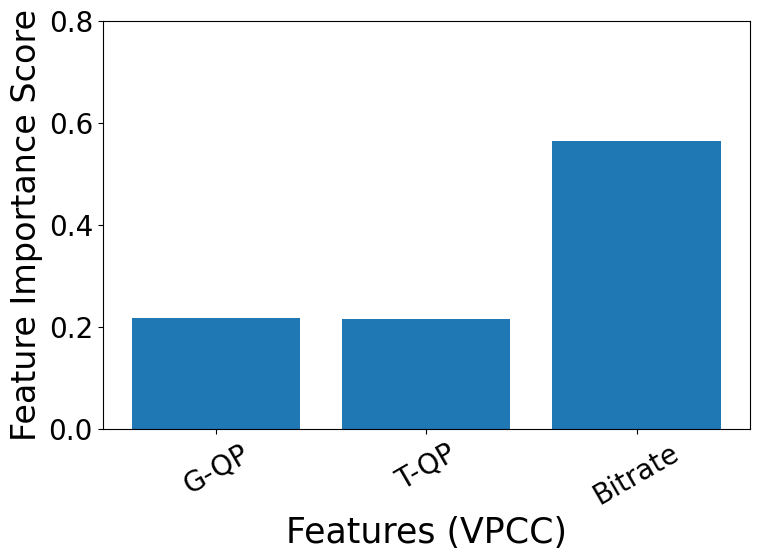

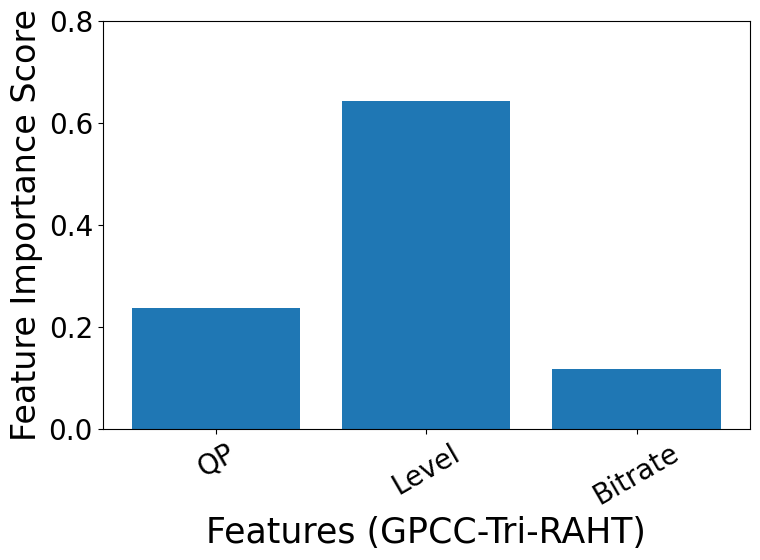

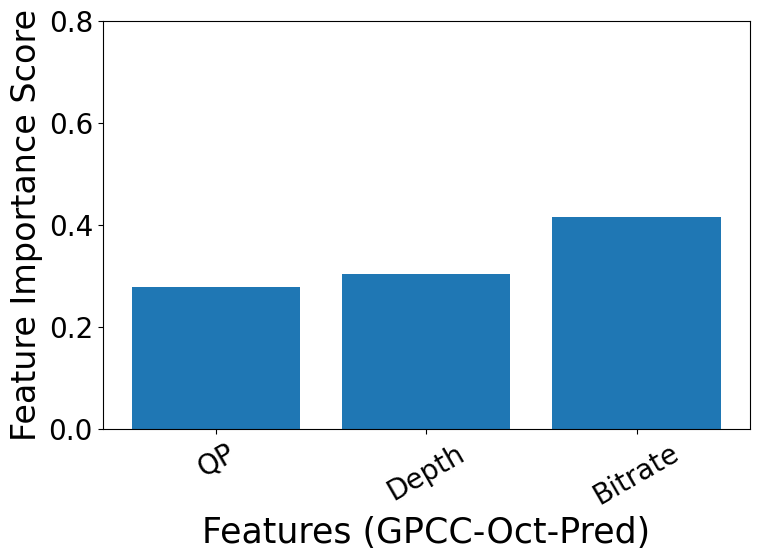

In [50]:
import numpy as np

for codec in CODECS:
        plt.rcParams.update({'font.size': 20})
        fig, ax = plt.subplots(figsize=(8,6))
        feature_importance, dict = get_feature_importance_and_dict(codec)
        plt.bar(np.arange(feature_importance.shape[1]),
                feature_importance.mean(),
                # yerr=[feature_importance.mean()-feature_importance.min(), feature_importance.max()-feature_importance.mean()], capsize=6)
                # yerr=feature_importance.std(),
                capsize=6)

        # print(np.concatenate((['a'], dict.keys()), axis=0))
        ax.set_xticks(range(len(dict.keys())))
        ax.set_xticklabels(labels=dict.keys(), rotation=30, fontsize=20)
        ax.set_yticks([0.0, 0.2,0.4, 0.6, 0.8])
        ax.set_xlabel(get_x_axis_name(codec), fontsize=25)
        ax.set_ylabel('Feature Importance Score', fontsize=24)
        plt.tight_layout()
        plt.savefig("./figures/feature_importances_" + get_feature_importance_graph_filename(codec) + ".pdf")